# Newton and Quasi-Newton Methods

In [3]:
%run ~/.jupyter/config.ipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import plots as p
import algos
import functions as funcs

from functools import partial
import matplotlib.pyplot as plt

import autograd.numpy as np
from autograd import grad, jacobian, hessian

assert "autograd" in np.__file__ # Need to make sure that we get the correct numpy

# Newton's Method


    This doesn't work because the hessian is not always PD.
    There are ways around this (see 3.4 in NW). I just haven't implemented them.
    


AssertionError: 

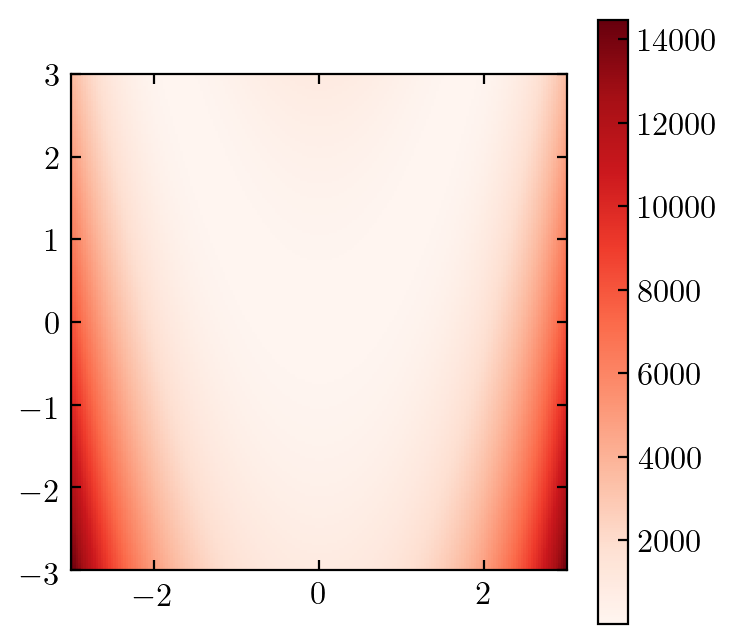

In [17]:
ax = p.surface_2d(funcs.rosenbrock, typ="image", lim=[-3, 3, -3, 3])

x0 = 6 * (np.random.random(size=2) - 0.5)
pos = algos.newton(funcs.rosenbrock, grad(funcs.rosenbrock), hessian(funcs.rosenbrock), x0)

# BFGS

Exception: Couldn't find a good line length, 0, 0, 10

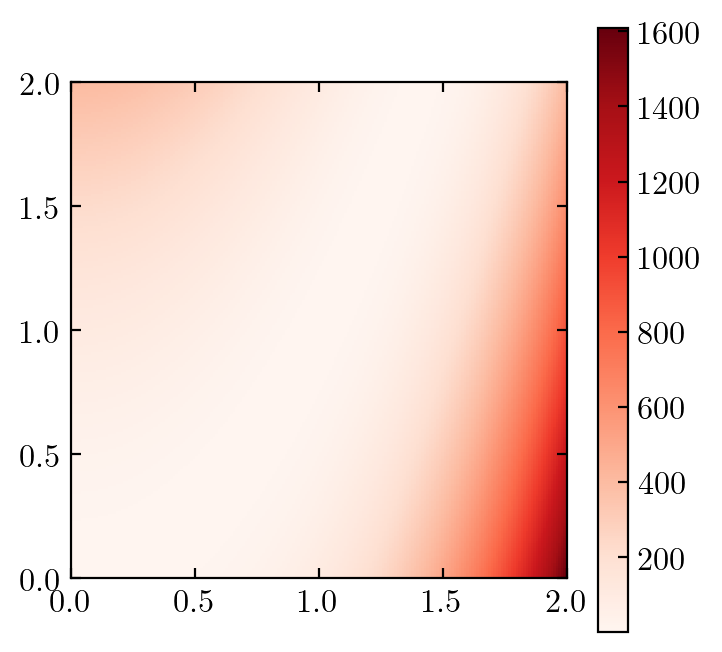

In [102]:
l = 1
ax = p.surface_2d(funcs.rosenbrock, typ="image", lim=[1-l, 1+l, 1-l, 1+l])

x0 = 6 * (np.random.random(size=2) - 0.5)
hess0 = np.array([[1, 0], [0, 1]])
pos = algos.BFGS(funcs.rosenbrock, grad(funcs.rosenbrock), hess0, x0)
ax.plot(pos[:,0], pos[:,1])
print(len(pos))

# L-BFGS

1429


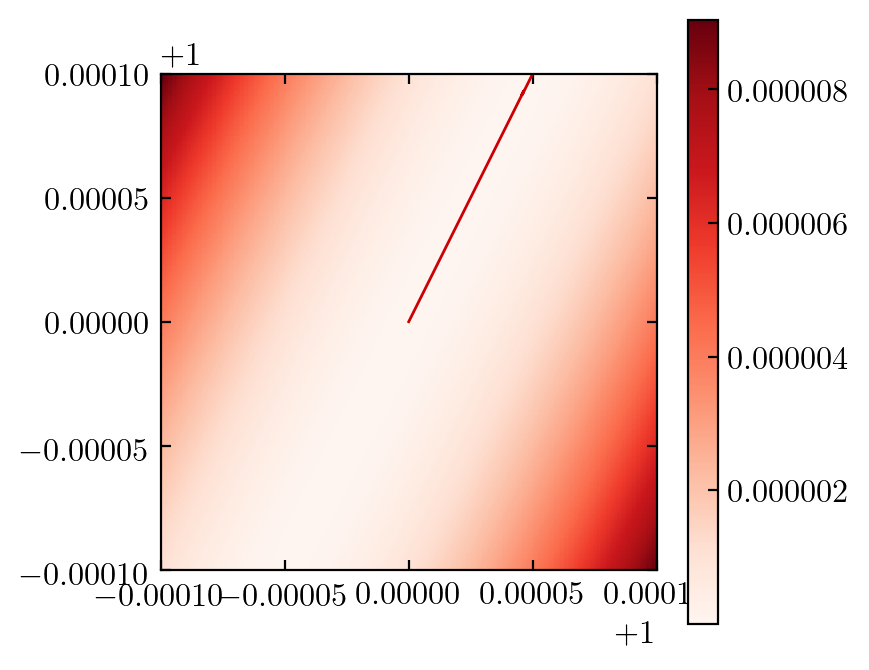

In [91]:
l = 0.0001
ax = p.surface_2d(funcs.rosenbrock, typ="image", lim=[1-l, 1+l, 1-l, 1+l])

x0 = 6 * (np.random.random(size=2) - 0.5)
pos = algos.L_BFGS(funcs.rosenbrock, grad(funcs.rosenbrock), x0)
ax.plot(pos[:,0], pos[:,1])
print(len(pos))

In [106]:
x0 = np.full(10, -1.)
pos = algos.L_BFGS(funcs.rosenbrock, grad(funcs.rosenbrock), x0, memory_len=10000)
print(len(pos))
print(pos[-1])

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.] 3521.8381564177535
[-0.77171012 -0.65813307 -0.65813307 -0.65813307 -0.65813307 -0.65813307 -0.65813307 -0.65813307 -0.65813307 -0.88642295] 1546.7667758474051
[-0.54342027 -0.31626613 -0.31626613 -0.31626613 -0.31626613 -0.31626613 -0.31626613 -0.31626613 -0.31626613 -0.77284595] 483.99010312037603
[-0.31513042  0.0256008   0.0256008   0.0256008   0.0256008   0.0256008   0.0256008   0.0256008   0.0256008  -0.65926895] 134.1335320384038
[-0.28659419  0.06833417  0.06833417  0.06833417  0.06833417  0.06833417  0.06833417  0.06833417  0.06833417 -0.64507182] 135.1445172120646
[-0.3008623   0.04696748  0.04696748  0.04696748  0.04696748  0.04696748  0.04696748  0.04696748  0.04696748 -0.65217039] 133.88869229037496


AssertionError: p needs to be in a descent direction